In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree

In [2]:
import graphviz

In [3]:
data = pd.read_csv("vars_final_zscale.csv")

In [4]:
# split data into out of date(after 16/11/1), train and test
oot_df=data[data['record']>833508]
trte_df=data[data['record']<=833508]

In [5]:
#split training and testing
train, test = train_test_split(trte_df, test_size=0.2,random_state=0)
        
# split lables and features 
train_lab = train["fraud_label"]
train_fea = train.iloc[:,1:16]

test_lab = test["fraud_label"]
test_fea = test.iloc[:,1:16]

oot_lab=oot_df["fraud_label"]
oot_fea=oot_df.iloc[:,1:16]

#define model
model=XGBClassifier(max_depth=3, 
            learning_rate=0.1, 
            n_estimators=500, 
            subsample=0.8, 
            colsample_bytree=1, 
            gamma=1)   #modify based on your model

#fit model
model.fit(train_fea,train_lab) #modify based on your model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

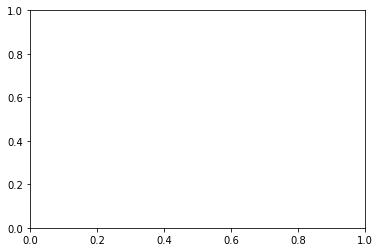

In [6]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

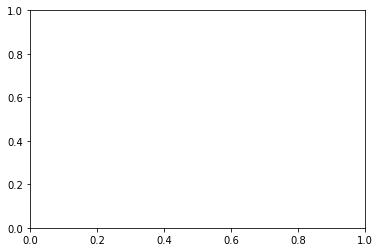

In [9]:
plot_tree(model)